In [ ]:
# KGP talkie
#https://www.youtube.com/watch?v=2arr7TeiW-A&list=PLc2rvfiptPSTvPFbNlT_TGRupzKKhJSIv&index=7

### KNN

* KNN is supervised machine learning algorithm that can be used to solve both classification and regression problems.
* Classification is supervised learning in which the response variable is ' categorical ' 
* Regression is supervised learning in which response is ordered and continuous 
* Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)            

###### Requirements for working with data in scikit-learn  
* 1.Features and response are separate objects.  

* 2.Features and response should be numeric ( this is the reason why our response wine.target stored as 0's,1's,2's  instead of the strings 'class_1', 'class_2', 'class_3 ' ) ,in scikit learn the response varible is always numeric regardless of whether its a regression problem or classification problem.

* 3.Features and response should be NumPy arrays( Numpy is a library for scientific computing that impliments homogeneous and multidimensional array known as an ndarray that has been optimised for fast computation, it turns out both wine.data,wine.target are alredy stored as ndarrays.

* 4.Features and response should have specific shapes.(specifically the feature objects should have 2 dimensions ,the response objects is expected to have a single dimension and that dimension should have the same magnitude as the 1st dimension of the feature objects Or there should be one response corresponding to each observation)

### Classifier Building in Python and Scikit-learn

In [1]:
# Using the wine dataset, which is a very famous classification problem.
# This dataset is the result of a chemical analysis of wines grown in the same region in italy using three different cultivars.
# The analysis determined the quantitites of the constituents found in each of the three types of wines. 

In [1]:
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
# The dataset has 13 features, it has three types of cultiver classes 'class_0','class_1','class_2' 
# Here u can build a model to classify the type of cultiver.
# This wine dataset available in scikit library or v can download it from uci machine learning repository

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X = wine.data
y = wine.target
df = pd.DataFrame(X,columns = wine.feature_names) 
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
X.shape,y.shape

((178, 13), (178,))

In [16]:
# Splitting the dataset to understand model performance 
# split the dataset by using function train_test_split(). U need to pass 3 parameters (features, target,  test_set size)
# additionaly,u can use (random_state) to select records randomly.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

### Generating model for K = 3

In [18]:
# Here we'll test for different values of K and finally decides which number of K is best suited for our classification.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.6851851851851852


### Generating model for K = 5

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.7222222222222222


### Generating model for K = 7

In [22]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.7407407407407407


#### Here we've increased the no.of neighbors in the model and accuracy got increased.But,this is not necesary for each and every case that an increase in many neighbors increases the accuracy.

* #### Pros:

* The training phase of KNN classification is much faster as compared to other classification algorithms. There is no need to train a model for generalization.That's why KNN is know as the simple and instance based algorithm. KNN can be useful in case of non linear data.It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value. 

* #### Cons: 

* The testing phase of KNN is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses Eucledian distance between two points to find nearest neighbors. Eucledian distance is sensitive to magnitudes. The features with high magnitudes will weigth more than the features with low magnitudes. KNN also not suitable for large dimensional data.


In [23]:
# From Cons we've seen that knn requires scalling
X
# here 'x' is not a scalled version of data
# So we need to standardise or normalise this data(x) to get better accuracy

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [24]:
# Since this KNN works on the distance based matrix, suppose that if class-A have some values into scale A and scale A < 1
# class-B have scale B and this scale B values r in 100,1000 then if calculate the distance between class-A and class-B we get 
# class weight tends to b skewed, so we need this classes or features to spaced into same dimension

### How to improve KNN?

######  Standerdization in sklearn

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [27]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [28]:
# So, if we compare X before standerdization and after standerdization(x_scaled) all the 13 features in the dataset has same
# scalling

In [29]:
# Now accuarcy should increase

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0, stratify = y)1

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.9629629629629629


In [30]:
# After standerdization we could see that for K=7 our KNN accuracy has increased from 74% to 96%

In [31]:
## Lets do the parameter tuning with a Cross Validation and try to find out the best fit(i.e.,best number of nearest neighbors
#  to this algorithm) 

### Parameter tuning with  Cross Validation

   * In this section, we'll explore a method that can b used to tune the hyperparameter K.

#### Cross validation can be used to estimate the test error associated with a learning method in order to evaluate its  performance, or to select  the appropriate level of flexibility

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
neighbors = list(range(1,50,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [35]:
cv_scores

[0.9439735982112143,
 0.954499914000688,
 0.9666322669418644,
 0.9663398692810456,
 0.97218782249742,
 0.9718954248366012,
 0.9666322669418644,
 0.9666322669418644,
 0.9725146198830409,
 0.9725146198830409,
 0.9725146198830409,
 0.9833333333333334,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9660130718954247,
 0.9718954248366012,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9610767113863089,
 0.9610767113863089,
 0.9551943584451325,
 0.9551943584451325,
 0.9551943584451325]

In [36]:
MSE = [1 - x for x in cv_scores ]   # Mean Square Error
MSE

[0.05602640178878571,
 0.04550008599931199,
 0.03336773305813556,
 0.03366013071895435,
 0.027812177502580027,
 0.028104575163398815,
 0.03336773305813556,
 0.03336773305813556,
 0.027485380116959113,
 0.027485380116959113,
 0.027485380116959113,
 0.016666666666666607,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.033986928104575265,
 0.028104575163398815,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.0389232886136911,
 0.0389232886136911,
 0.04480564155486755,
 0.04480564155486755,
 0.04480564155486755]

In [37]:
optimal_k = neighbors[MSE.index(min(MSE))]
print("The Optimal number of k is: ",optimal_k)

The Optimal number of k is:  23


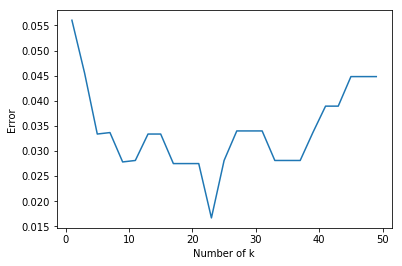

In [38]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of k')
plt.ylabel('Error')
plt.show()

In [39]:
# From plot we see that 23 is showing the minimum error, so K=23 is the best result for our classification

In [40]:
# Let's check the accuracy at K=23

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0, stratify = y)

knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.9814814814814815


### KNN implimenting on iris dataset

In [2]:
# This dataset consisits of 50 samples of 3 different species of iris(150 samples total)
# Measurements: sepal length, sepal width, petal length, petal width

# Framed as a supervised learning problem: Predict the species of an iris using the measurements
# Famous dataset fro machine learning because prediction is easy
# Learn more about the iris dataset: UCI Machine Learning Repository

### Loading the iris dataset into scikit-learn

In [42]:
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [51]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [52]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
# looking at iris.target u might be wondering how that this is a classification probelm and not a regression problem ?
# Since all u can see is numbers 0,1,2 the answer is u cannot tell the difference, as a ML practitioner u have to understand how
# your data is encoded and decide whether ur response variable is suited for regression and classification.

# In this case(iris.data) we know that the numbrs 0,1,2 represent on order categories and thus v know to use classifiaction 
# techniques and not regression techniques inorder to solve this problem 

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.iloc[:,0:4]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = iris.iloc[:,-1]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [6]:
X.shape,y.shape

((150, 4), (150,))

In [8]:
np.sqrt(150)

12.24744871391589

In [10]:
# by thumb rule we took n_neighbors(by sqrt(no of observations)) it is not applicable every time.
# as the response or target variable has 3 diffrent classes v could go for n_neighbors = 3 but for now we go by thumb rule

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)

In [11]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [24]:
y_pred = knn.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [25]:
# Comparing predicted values(y_pred) with actual values(y)
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [15]:
type(y)

pandas.core.series.Series

In [20]:
## How to convert series into array ?  Ans = y.values   check type(y.values)

y.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [30]:
# combining this predicted and actual values into dataframe

a = pd.DataFrame(data = [y_pred,y.values])
a.transpose()

,0,1
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,setosa,setosa
7,setosa,setosa
8,setosa,setosa
9,setosa,setosa


In [32]:
# In real world when using ML algorithm v split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [33]:
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [36]:
y_test_pred = knn.predict(X_test)
y_test_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [37]:
y_test.values

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype=object)

In [40]:
prediction_output = pd.DataFrame(data = [y_test_pred,y_test.values])
prediction_output.transpose()

,0,1
0,setosa,setosa
1,versicolor,versicolor
2,versicolor,versicolor
3,setosa,setosa
4,virginica,virginica
5,versicolor,versicolor
6,virginica,virginica
7,setosa,setosa
8,setosa,setosa
9,virginica,virginica
